# Práctica 2.

## Semana 1. Vecinos próximos

Read data

In [2]:
import numpy as np
import pandas as pd
from statistics import mode 

filename="ConjuntosDatosP2/pima-indians-diabetes.data"
filename2="ConjuntosDatosP2/wdbc.data"
data = pd.read_csv(filename)
data1=pd.read_csv(filename2)

column_names=list(data.columns)
column_names1=list(data1.columns)
print(column_names, column_names1)
class_name="Class"

class_list=data[class_name].values
class_list1=data1[class_name].values

['Pregs', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age', 'Class'] ['Atributo1', 'Atributo2', 'Atributo3', 'Atributo4', 'Atributo5', 'Atributo6', 'Atributo7', 'Atributo8', 'Atributo9', 'Atributo10', 'Atributo11', 'Atributo12', 'Atributo13', 'Atributo14', 'Atributo15', 'Atributo16', 'Atributo17', 'Atributo18', 'Atributo19', 'Atributo20', 'Atributo21', 'Atributo22', 'Atributo23', 'Atributo24', 'Atributo25', 'Atributo26', 'Atributo27', 'Atributo28', 'Atributo29', 'Atributo30', 'Class']


In [10]:
import numpy as np
import pandas as pd
from statistics import mode 
class ClasificadorVecinosProximos:
    def __init__(self,train_set, classes):
        self.train=train_set.copy(deep=True)
        self.classes=classes
        self.class_names=np.unique(self.classes)
        self.normalize_done=False
        self.calcularMediasDesv()
        
    def calcularMediasDesv(self):
        self.mean=self.train.mean(axis=0)
        self.std=self.train.std(axis=0)
    def normalizarDato(self, dato):
        x=(dato-self.mean.values)/self.std.values
        return(x)
    def normalizarDatos(self):
        if not self.normalize_done:
            for att in self.train.columns:
                self.train[att]=(self.train[att]-self.mean[att])/self.std[att]
                self.normalize_done=True
        return(self.train)

    def euclidian_distance(self,dato):
        i=0
        square_dist=0
        for att in self.train.columns:
            square_dist=square_dist+(self.train[att].values-dato[i])**2
            i+=1
        square_dist=square_dist**0.5
        return(square_dist)
    def manhatten_distance(self,dato):
        i=0
        dist=0
        for att in self.train.columns:
            dist=dist+(self.train[att].values-dato[i])
            i+=1
        return(abs(dist))
    def mahalanobis_distance(self,dato): 
        X=self.train.values
        if self.normalize_done:
            mu=np.zeros(len(dato))
        else:
            mu=self.mean
        cov=np.cov(np.transpose(X-mu))
        diff=dato - mu
        inv=np.linalg.inv(cov)
        left=np.dot(diff,inv)
        dist=np.dot(left,np.transpose(diff))
        return(dist)
    def kneigbour_class(self, x, k, dist_type):
        if dist_type=="manhatten":
            dist=self.manhatten_distance(x)
        elif dist_type=="mahalanobis":
            dist=self.mahalanobis_distance(x)
        else:
            dist=self.euclidian_distance(x)
        idx = np.argpartition(dist, k)
        idx=idx[0:k]
        #print(idx)
        #print(self.classes[idx])
        return mode(self.classes[idx])

Normalize data: calcularMediasDesv(self,datos,nominalAtributos); normalizarDatos(self,datos,nominalAtributos):

In [21]:
import EstrategiaParticionado

estrategia=EstrategiaParticionado.ValidacionSimple(0.3, 1)
parts = estrategia.creaParticiones(data)
test_row_id=parts[0].indicesTest
train_row_id=parts[0].indicesTrain

atributes=['Pregs', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age']

#Selecting only columns with atributes required
train=data.loc[train_row_id,atributes].copy()
train_class_list=data.loc[train_row_id,class_name]


test=data.loc[test_row_id,atributes]
test_class_list=data.loc[test_row_id,class_name]

In [28]:
def error(model, test, test_classes, normalize, k, distance):
    err=0
    for index, row in test.iterrows():
        if normalize:
            row=model.normalizarDato(row.values)
        predicted=model.kneigbour_class(row, k, distance)
        if predicted!=test_classes.loc[index]:
            err+=1
    return (round(err/test.shape[0],2))

k_n=[1, 3, 5, 11, 21]

mod_kn=ClasificadorVecinosProximos(train, train_class_list.values)
norm_data=mod_kn.normalizarDatos()

print("Error:")
print("Dataset: ", filename)
print("Atributos utilizados: ", atributes)
print("Datos normalizados, distancia euclidia")
for k in k_n:
    print("K: ", k, error(mod_kn, test, test_class_list, True, k, "euclidian"))
print("Datos normalizados, distancia manhatten")
for k in k_n:
    print("K: ", k, error(mod_kn, test, test_class_list, True, k, "manhatten"))

    
mod=ClasificadorVecinosProximos(train, train_class_list.values)  
print("Datos sin normalizar, distancia euclidia")
for k in k_n:
    print("K: ", k, error(mod_kn, test, test_class_list, False, k, "euclidian"))
print("Datos sin normalizar, distancia manhatten")
for k in k_n:
    print("K: ", k, error(mod_kn, test, test_class_list, False, k, "manhatten"))

Error:
Dataset:  ConjuntosDatosP2/pima-indians-diabetes.data
Atributos utilizados:  ['Pregs', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age']
Datos normalizados, distancia euclidia
K:  1 0.25
K:  3 0.27
K:  5 0.24
K:  11 0.23
K:  21 0.23
Datos normalizados, distancia manhatten
K:  1 0.39
K:  3 0.31
K:  5 0.3
K:  11 0.31
K:  21 0.27
Datos sin normalizar, distancia euclidia
K:  1 0.66
K:  3 0.51
K:  5 0.7
K:  11 0.7
K:  21 0.7
Datos sin normalizar, distancia manhatten
K:  1 0.3
K:  3 0.7
K:  5 0.7
K:  11 0.7
K:  21 0.7


In [25]:
estrategia=EstrategiaParticionado.ValidacionSimple(0.3, 1)
parts1 = estrategia.creaParticiones(data1)
test_row_id1=parts1[0].indicesTest
train_row_id1=parts1[0].indicesTrain

atributes1=['Atributo1', 'Atributo2', 'Atributo3', 'Atributo4', 'Atributo5', 'Atributo6', 'Atributo7', 'Atributo8', 'Atributo9', 'Atributo10', 'Atributo11', 'Atributo12', 'Atributo13', 'Atributo14', 'Atributo15', 'Atributo16', 'Atributo17', 'Atributo18', 'Atributo19', 'Atributo20', 'Atributo21', 'Atributo22', 'Atributo23', 'Atributo24', 'Atributo25', 'Atributo26', 'Atributo27', 'Atributo28', 'Atributo29', 'Atributo30']

#Selecting only columns with atributes required
train1=data1.loc[train_row_id1,atributes1].copy()
train_class_list1=data1.loc[train_row_id1,class_name]


test1=data1.loc[test_row_id1,atributes1]
test_class_list1=data1.loc[test_row_id1,class_name]

In [29]:
mod_kn1=ClasificadorVecinosProximos(train1, train_class_list1.values)
norm_data1=mod_kn1.normalizarDatos()

print("Error:")
print("Dataset: ", filename2)
print("Atributos utilizados: ", atributes1)
print("Datos normalizados, distancia euclidia")
for k in k_n:
    print("K: ", k, error(mod_kn1, test1, test_class_list1, True, k, "euclidian"))
print("Datos normalizados, distancia manhatten")
for k in k_n:
    print("K: ", k, error(mod_kn1, test1, test_class_list1, True, k, "manhatten"))

    
mod1=ClasificadorVecinosProximos(train1, train_class_list1.values)  
print("Datos sin normalizar, distancia euclidia")
for k in k_n:
    print("K: ", k, error(mod_kn1, test1, test_class_list1, False, k, "euclidian"))
print("Datos sin normalizar, distancia manhatten")
for k in k_n:
    print("K: ", k, error(mod_kn1, test1, test_class_list1, False, k, "manhatten"))

Error:
Dataset:  ConjuntosDatosP2/wdbc.data
Atributos utilizados:  ['Atributo1', 'Atributo2', 'Atributo3', 'Atributo4', 'Atributo5', 'Atributo6', 'Atributo7', 'Atributo8', 'Atributo9', 'Atributo10', 'Atributo11', 'Atributo12', 'Atributo13', 'Atributo14', 'Atributo15', 'Atributo16', 'Atributo17', 'Atributo18', 'Atributo19', 'Atributo20', 'Atributo21', 'Atributo22', 'Atributo23', 'Atributo24', 'Atributo25', 'Atributo26', 'Atributo27', 'Atributo28', 'Atributo29', 'Atributo30']
Datos normalizados, distancia euclidia
K:  1 0.06
K:  3 0.05
K:  5 0.05
K:  11 0.05
K:  21 0.09
Datos normalizados, distancia manhatten
K:  1 0.19
K:  3 0.16
K:  5 0.15
K:  11 0.13
K:  21 0.13
Datos sin normalizar, distancia euclidia
K:  1 0.67
K:  3 0.67
K:  5 0.67
K:  11 0.67
K:  21 0.67
Datos sin normalizar, distancia manhatten
K:  1 0.67
K:  3 0.67
K:  5 0.67
K:  11 0.67
K:  21 0.67


In [30]:
def confusion_mx_knn(model, test, test_classes, normalize, k, distance, positive, negative):
    confusion_matrix=np.zeros([2,2])
    for index, row in test.iterrows():
        if normalize:
            row=mod_kn.normalizarDato(row.values)
        predicted=model.kneigbour_class(row, k, distance)
        real=test_classes.loc[index]
        if predicted==positive:
            if real==positive:
                confusion_matrix[0,0]+=1
            else: 
                confusion_matrix[0,1]+=1
        else:
            if real==negative:
                confusion_matrix[1,1]+=1
            else: 
                confusion_matrix[1,0]+=1

    return(confusion_matrix)

mod_kn_norm=ClasificadorVecinosProximos(train, train_class_list.values)
norm_data=mod_kn_norm.normalizarDatos()
print(confusion_mx_knn(mod_kn_norm, test, test_class_list, True, 11, "euclidian", 1, 0))

[[ 38.  21.]
 [ 31. 140.]]


Test fields for calculating mahalanobis distance

In [108]:
X=norm_data[atributes].values
mu=np.zeros(len(dato))
print(mu)
cov=np.dot(np.transpose(X),X)
print(np.cov(np.transpose(X)))
diff=dato - mu
print(diff)
inv=np.linalg.inv(cov)
left=np.dot(np.transpose(diff),inv)
dist=np.dot(left,diff)
print(cov)
print(dist)

[0. 0. 0. 0. 0.]
[[ 1.          0.12945867  0.14128198 -0.08167177 -0.07353461]
 [ 0.12945867  1.          0.15258959  0.05732789  0.33135711]
 [ 0.14128198  0.15258959  1.          0.20737054  0.08893338]
 [-0.08167177  0.05732789  0.20737054  1.          0.43678257]
 [-0.07353461  0.33135711  0.08893338  0.43678257  1.        ]]
[ 1.23307662 -0.68479006  0.76951228 -1.28737326 -0.69243932]
[[767.          99.29480104 108.36327667 -62.642251   -56.40104921]
 [ 99.29480104 767.         117.0362129   43.9704922  254.15090331]
 [108.36327667 117.0362129  767.         159.05320296  68.21190121]
 [-62.642251    43.9704922  159.05320296 767.         335.01223128]
 [-56.40104921 254.15090331  68.21190121 335.01223128 767.        ]]
0.0059563634110414996


In [54]:
#for i in range(data.shape[0])

matrix=np.matrix(norm_data)
matrix=np.transpose(matrix)
example=matrix[column_ids]


X = np.stack((example, np.matrix(norm_point)), axis=0)
print(X)
cov=np.cov(X)
print(cov)
dist=(np.transpose(example - norm_point)*np.linalg.inv(cov)*(example - norm_point))**0.5

print(dist)

NameError: name 'column_ids' is not defined

## Semana 2. Regresión logistica
ClasificadorRegresionLogistica


Indians:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [45]:
class ClasificadorRegresionLogistica:
    def __init__(self,train_set, classes):
        self.train_set=train_set
        self.classes=classes
        self.class_names=np.unique(self.classes)
        self.class1=self.class_names[0]
    def gradient_descent(self, rounds, eta):
        
        self.w=np.zeros(train_set.shape[1]+1)+0.5
        for r in range(rounds):
            for i in range(train_set.shape[0]):
                x=np.array(train_set.iloc[i].values)
                x=np.insert(x,0,1)
                x=np.transpose(x)
                if classes[i]==self.class1:
                    t=1
                else:
                    t=0
                wx=np.dot(self.w,x)
                self.w=self.w-eta*(1/(1+np.exp(-wx))-t)*x
        return(self.w)
    def classify(self,x):
        x=np.array(x)
        x=np.insert(x,0,1)
        x=np.transpose(x)
        wx=np.dot(self.w,x)
        if wx>=0:
            return self.class1
        else:
            return self.class_names[1]

In [46]:
import matplotlib.pyplot as plt

atributes=["Pregs","Plas","Pres","Skin","Test"]
filter_zeros=[False, True, True, True, True]



#Filtering zero values
for i in range(len(atributes)):
    if filter_zeros[i]:
        data_filtered=data.loc[data[atributes[i]]!=0]
train_set=data_filtered[atributes]
classes=data_filtered[class_name].values
        
model=ClasificadorRegresionLogistica(train_set,classes)
w=model.gradient_descent(2, 0.01)
print(w)

x=[5,166,72,19,175]
print(model.classify(x))

[ 0.76231026 -1.81024661 -3.04442101  7.70882322  1.44732753 -0.37151191]
0


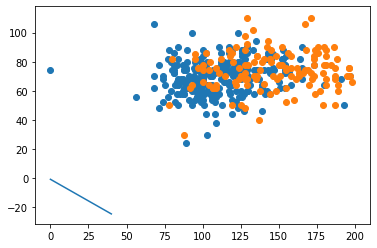

In [47]:
x_a=np.array([0,40])
y_a=-w[1]/w[2]*x_a-w[0]


data_c1=train_set.loc[data['Class'] == 0]
data_c2=train_set.loc[data['Class'] == 1]
plt.scatter(data_c1[atributes[1]], data_c1[atributes[2]])
plt.scatter(data_c2[atributes[1]], data_c2[atributes[2]])
plt.plot(x_a,y_a)

In [48]:
atributes=["Atributo1","Atributo2","Atributo3","Atributo4","Atributo5"]
filter_zeros=[False, True, True, True, True]

#Selecting only columns with atributes required
train_set1=data1[atributes]

classes1=data1[class_name].values
        
model1=ClasificadorRegresionLogistica(train_set1,classes1)
w1=model1.gradient_descent(2, 0.01)
print(w1)
x=[14.54,27.54,96.73,658.8,0.1139]
print(model1.classify(x))

[ 0.49        0.49       -0.39       -0.16000025  0.26999993 -0.44000008]
B


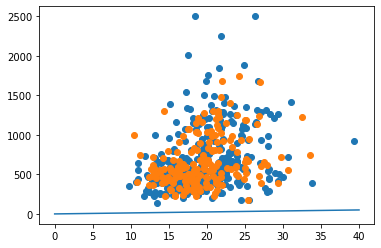

In [49]:
x_a=np.array([0,40])
y_a=-w1[1]/w1[2]*x_a-w1[0]


data_c1=train_set1.loc[data['Class'] == 0]
data_c2=train_set1.loc[data['Class'] == 1]
plt.scatter(data_c1[atributes[1]], data_c1[atributes[3]])
plt.scatter(data_c2[atributes[1]], data_c2[atributes[3]])
plt.plot(x_a,y_a)